In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

In [11]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
df.shape

(70000, 13)

In [14]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

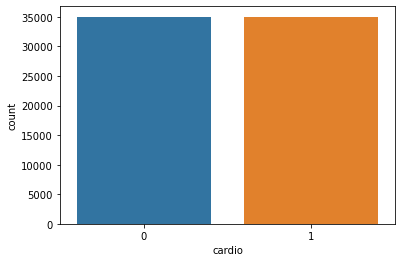

In [15]:
seaborn.countplot(df['cardio'])

In [16]:
df.isnull().values.any()

False

In [17]:
#sobgula column-onusare null value dekhay
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

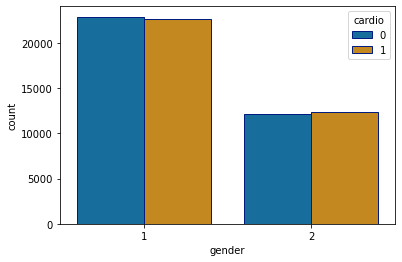

In [18]:
seaborn.countplot(x='gender',hue='cardio',data = df, palette = 'colorblind',edgecolor = seaborn.color_palette('dark',n_colors=1))

In [61]:
df['yr'] = (df['age']/365).round(0)

In [62]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

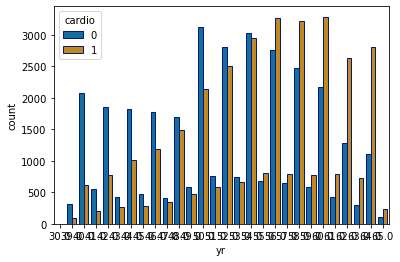

In [63]:
seaborn.countplot(x='yr',hue='cardio',data = df, palette = 'colorblind',edgecolor = seaborn.color_palette('dark',n_colors=1))

In [21]:

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [22]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [23]:
df = df.drop(['yr'],axis=1)

In [24]:
x = df.iloc[:,:-1]

In [25]:
y = df.iloc[:,12]

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
from sklearn.feature_selection import f_classif

In [28]:
FIT_FEATURES=SelectKBest(score_func=f_classif)

In [29]:
FIT_FEATURES.fit(x,y)

SelectKBest()

In [33]:
#for each column we calculate score  ... ,er por columns= likhle headline print hobe
SCORE_COL=pd.DataFrame(FIT_FEATURES.scores_,columns=['score value'])

In [34]:
SCORE_COL

,score value
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [35]:
NAME_COL = pd.DataFrame(x.columns)

In [37]:
#doing score_col, name_col concate 
top_features = pd.concat([NAME_COL,SCORE_COL],axis=1)

In [38]:
top_features

,0,score value
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [39]:
#for showing top value we use nlargest
top_features.nlargest(8,'')

,0,score value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


In [40]:
#drop single columns
df.drop('id',axis=1,inplace=True)

In [41]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [43]:
#drop multiple columns
df = df.drop(['gender', 'height','active'], axis = 1) 

In [44]:
df

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
0,18393,62.0,110,80,1,1,0,0,0
1,20228,85.0,140,90,3,1,0,0,1
2,18857,64.0,130,70,3,1,0,0,1
3,17623,82.0,150,100,1,1,0,0,1
4,17474,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,0,0
69996,22601,126.0,140,90,2,2,0,0,1
69997,19066,105.0,180,90,3,1,0,1,1
69998,22431,72.0,135,80,1,2,0,0,1


In [45]:
x1 = df.iloc[:,:-1]

In [46]:
x1

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
0,18393,62.0,110,80,1,1,0,0
1,20228,85.0,140,90,3,1,0,0
2,18857,64.0,130,70,3,1,0,0
3,17623,82.0,150,100,1,1,0,0
4,17474,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,0
69996,22601,126.0,140,90,2,2,0,0
69997,19066,105.0,180,90,3,1,0,1
69998,22431,72.0,135,80,1,2,0,0


In [47]:
y1 = df.iloc[:,8]

In [48]:
y1

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.30, random_state=1)

In [51]:
xtrain

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
23561,16136,71.0,100,80,1,1,1,0
34858,14615,69.0,140,80,2,1,0,0
54953,20507,65.0,120,80,1,1,0,0
59230,16720,53.0,100,60,1,1,0,0
1730,21050,71.0,140,90,1,1,0,0
...,...,...,...,...,...,...,...,...
49100,21289,78.0,120,80,1,1,0,0
20609,19116,68.0,120,80,1,1,0,0
21440,18049,82.0,120,80,1,1,0,0
50057,21957,77.0,120,80,1,1,0,0


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rclf = RandomForestClassifier()

In [54]:
rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [55]:
rclf.score(xtest,ytest)

0.688952380952381

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
clf =DecisionTreeClassifier()

In [58]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [59]:
clf.score(xtest,ytest)

0.6409047619047619

# Feature Importance

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
model = ExtraTreesClassifier()

In [71]:
model.fit(x,y)

ExtraTreesClassifier()

In [74]:
model.feature_importances_

array([0.15920577, 0.20440883, 0.00555966, 0.13575832, 0.14863457,
       0.17152549, 0.10358457, 0.046154  , 0.01125514, 0.00401626,
       0.0044164 , 0.005481  ])

In [75]:
top=pd.Series(model.feature_importances_,index=x.columns)

In [76]:
top

id             0.159206
age            0.204409
gender         0.005560
height         0.135758
weight         0.148635
ap_hi          0.171525
ap_lo          0.103585
cholesterol    0.046154
gluc           0.011255
smoke          0.004016
alco           0.004416
active         0.005481
dtype: float64

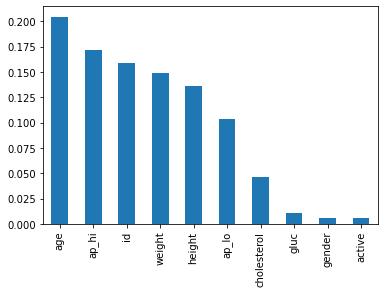

In [81]:
top.nlargest(10).plot(kind='bar')

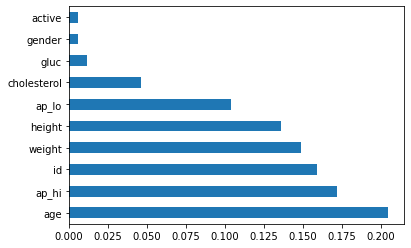

In [82]:
top.nlargest(10).plot(kind='barh')